## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

In [6]:
# Checking the number of mice in the DataFrame.
data_df['Mouse ID'].nunique()

249

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

    #create df with duplicate mouse ID info  ***using .loc[] and .duplicated() nested inside***
duplicate_ID = data_df.loc[data_df.duplicated() == True, :]
print(duplicate_ID)

    #display df with all duplicated mouse ID info, "g989"  ***"g989" found with code above inside this cell**
data_df[data_df["Mouse ID"] == "g989"]

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0  


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
    #g989 is the Mouse ID found in cell above. this is hard coded in dropping by 'Mouse ID'
data_df = data_df[data_df['Mouse ID'] != "g989"]

In [11]:
# Checking the number of mice in the clean DataFrame.
data_df['Mouse ID'].nunique()

248

## Summary Statistics

In [12]:
data_df["Timepoint"].value_counts()

0     248
5     236
10    221
15    205
20    193
25    182
30    170
35    153
40    142
45    130
Name: Timepoint, dtype: int64

In [13]:
data_df["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

In [16]:
# Generate a summary statistics table:

##old code##

#mean, median, variance, SD, SEM of the tumor volume for each regimen
# #capomulin
# Capomulin_df = data_df.loc[data_df["Drug Regimen"] == "Capomulin", :]
# #ramicane
# Ramicane_df = data_df.loc[data_df["Drug Regimen"] == "Ramicane", :]
# #ketapril
# Ketapril_df = data_df.loc[data_df["Drug Regimen"] == "Ketapril", :]
# #zoniferol
# Zoniferol_df = data_df.loc[data_df["Drug Regimen"] == "Zoniferol", :]
# #placebo
# Placebo_df = data_df.loc[data_df["Drug Regimen"] == "Placebo", :]
# #stelasyn
# Stelasyn_df = data_df.loc[data_df["Drug Regimen"] == "Stelasyn", :]
# #ceftamin
# Ceftamin_df = data_df.loc[data_df["Drug Regimen"] == "Ceftamin", :]
# #infubinol
# Infubinol_df = data_df.loc[data_df["Drug Regimen"] == "Infubinol", :]
# #propriva
# Propriva_df = data_df.loc[data_df["Drug Regimen"] == "Propriva", :]

#stats summary df
# stat_dict = ({"Drug Regimen": ["Capomulin", "Ramicane", "Ketapril", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin","Infubinol", "Probriva"],
#             "Mean": [Capomulin_df["Tumor Volume (mm3)"].mean(), Ramicane_df["Tumor Volume (mm3)"].mean(), Ketapril_df["Tumor Volume (mm3)"].mean(), Zoniferol_df["Tumor Volume (mm3)"].mean(), Placebo_df["Tumor Volume (mm3)"].mean(), Stelasyn_df["Tumor Volume (mm3)"].mean(), Ceftamin_df["Tumor Volume (mm3)"].mean(), Infubinol_df["Tumor Volume (mm3)"].mean(), Propriva_df["Tumor Volume (mm3)"].mean()],
#             "Median": [Capomulin_df["Tumor Volume (mm3)"].median(), Ramicane_df["Tumor Volume (mm3)"].median(), Ketapril_df["Tumor Volume (mm3)"].median(), Zoniferol_df["Tumor Volume (mm3)"].median(), Placebo_df["Tumor Volume (mm3)"].median(), Stelasyn_df["Tumor Volume (mm3)"].median(), Ceftamin_df["Tumor Volume (mm3)"].median(), Infubinol_df["Tumor Volume (mm3)"].median(), Propriva_df["Tumor Volume (mm3)"].median()],
#             "Variance": [Capomulin_df["Tumor Volume (mm3)"].var(), Ramicane_df["Tumor Volume (mm3)"].var(), Ketapril_df["Tumor Volume (mm3)"].var(), Zoniferol_df["Tumor Volume (mm3)"].var(), Placebo_df["Tumor Volume (mm3)"].var(), Stelasyn_df["Tumor Volume (mm3)"].var(), Ceftamin_df["Tumor Volume (mm3)"].var(), Infubinol_df["Tumor Volume (mm3)"].var(), Propriva_df["Tumor Volume (mm3)"].var()],
#             "SD": [Capomulin_df["Tumor Volume (mm3)"].std(), Ramicane_df["Tumor Volume (mm3)"].std(), Ketapril_df["Tumor Volume (mm3)"].std(), Zoniferol_df["Tumor Volume (mm3)"].std(), Placebo_df["Tumor Volume (mm3)"].std(), Stelasyn_df["Tumor Volume (mm3)"].std(), Ceftamin_df["Tumor Volume (mm3)"].std(), Infubinol_df["Tumor Volume (mm3)"].std(), Propriva_df["Tumor Volume (mm3)"].std()],
#             "SEM": [Capomulin_df["Tumor Volume (mm3)"].sem(), Ramicane_df["Tumor Volume (mm3)"].sem(), Ketapril_df["Tumor Volume (mm3)"].sem(), Zoniferol_df["Tumor Volume (mm3)"].sem(), Placebo_df["Tumor Volume (mm3)"].sem(), Stelasyn_df["Tumor Volume (mm3)"].sem(), Ceftamin_df["Tumor Volume (mm3)"].sem(), Infubinol_df["Tumor Volume (mm3)"].sem(), Propriva_df["Tumor Volume (mm3)"].sem()]})
# stat_df = pd.DataFrame(stat_dict)
# sat_df = stat_df.groupby("Drug Regimen")
# stat_df

##new code##

#groupby and df formatting
drug_df = data_df.groupby(["Drug Regimen"])

t_mean = drug_df['Tumor Volume (mm3)'].mean()
t_median = drug_df['Tumor Volume (mm3)'].median()
t_var = drug_df['Tumor Volume (mm3)'].var()
t_sd  = drug_df['Tumor Volume (mm3)'].std()
t_sem = drug_df['Tumor Volume (mm3)'].sem()


drug_df = pd.DataFrame({"Mean": t_mean,
                       "Median": t_median,
                       "Varianve": t_var,
                       "Standard Var": t_sd,
                       "Standard Error": t_sem})
drug_df

,Mean,Median,Varianve,Standard Var,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table:
#mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar Plots

In [ ]:
#pandas
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.







Text(0, 0.5, 'Number of Data Points')

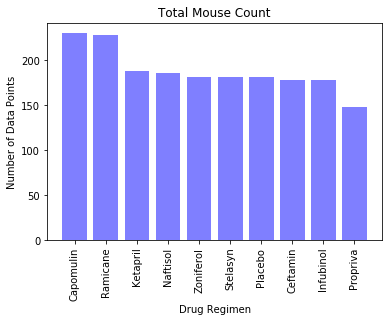

In [42]:
#pylpot
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#set x axis
x_axis = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
          'Stelasyn', 'Placebo', 'Ceftamin', 'Infubinol', 'Propriva']
#create drug count variables
capcount = data_df.loc[data_df["Drug Regimen"]=="Capomulin","Mouse ID"].count()
ramcount = data_df.loc[data_df["Drug Regimen"]=="Ramicane","Mouse ID"].count()
ketcount = data_df.loc[data_df["Drug Regimen"]=="Ketapril","Mouse ID"].count()
nafcount = data_df.loc[data_df["Drug Regimen"]=="Naftisol","Mouse ID"].count()
zoncount = data_df.loc[data_df["Drug Regimen"]=="Zoniferol","Mouse ID"].count()
stelcount = data_df.loc[data_df["Drug Regimen"]=="Stelasyn","Mouse ID"].count()
placcount = data_df.loc[data_df["Drug Regimen"]=="Placebo","Mouse ID"].count()
ceftcount = data_df.loc[data_df["Drug Regimen"]=="Ceftamin","Mouse ID"].count()
infcount = data_df.loc[data_df["Drug Regimen"]=="Infubinol","Mouse ID"].count()
procount = data_df.loc[data_df["Drug Regimen"]=="Propriva","Mouse ID"].count()
#set y axis
y_axis = [capcount, ramcount, ketcount, nafcount, zoncount,
          stelcount, placcount, ceftcount, infcount, procount]
#plot a bar graph
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align='center')
#display
plt.xticks(rotation='vertical')
plt.title("Total Mouse Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

## Pie Plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

Text(0.0, 1.0, 'Sex')

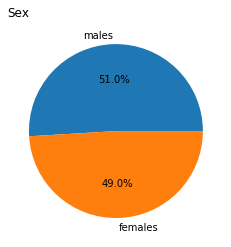

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#pyplot
male = data_df.loc[data_df["Sex"] == "Male",'Mouse ID'].count()
female = data_df.loc[data_df["Sex"] == "Female",'Mouse ID'].count()
labels = "males","females"
#plot pie chart
plt.pie([male,female],labels = labels,autopct='%1.1f%%')
plt.title("Sex", loc = "left")

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.






In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
